In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive


#Mount Google Drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [3]:
# Define the path to the excel file (replace with your file path on Google Drive)
file_path = '/content/MyDrive/MyDrive/df14.csv'

In [4]:
# Read the .csv file into a DataFrame
df1 = pd.read_csv(file_path)

In [5]:
df1.head()

Datetime        NO2       PM10     PM2.5     RH       Temp  \
0  2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.84  20.880000   
1  2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.84  21.116667   
2  2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.84  20.716667   
3  2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.84  20.383333   
4  2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.84  20.466667   

           WD        WS  
0   80.880000  0.300000  
1  152.250000  0.233333  
2  163.016667  0.266667  
3   55.550000  0.233333  
4   33.583333  0.250000

                  Datetime        NO2       PM10     PM2.5         RH  \
0      2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.840000   
1      2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.840000   
2      2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.840000   
3      2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.840000   
4      2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.840000   
...                    ...        ...        ...       ...        ...   
44926  2023-02-27 19:00:00   9.119333  14.201667  6.553333  67.200000   
44927  2023-02-27 20:00:00   8.962333  14.036667  6.165000  69.583333   
44928  2023-02-27 21:00:00   9.567000  13.128333  5.685000  67.933333   
44929  2023-02-27 22:00:00   8.408667  12.518333  5.603333  69.766667   
44930  2023-02-27 23:00:00   7.899500  12.851667  5.571667  74.300000   

            Temp          WD        WS  
0      20.880000   80.880000  0.300000  
1      21.116667  152.250000  0.233333  


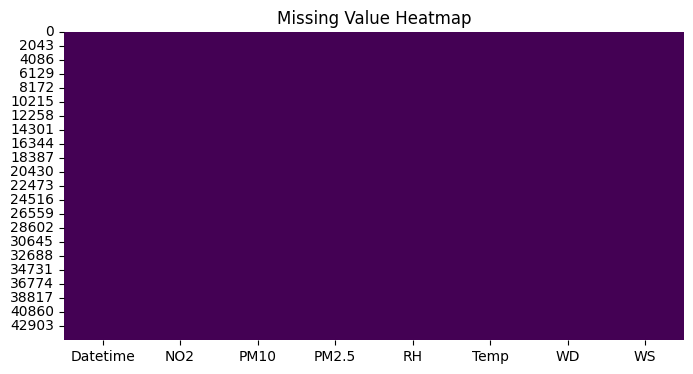


Pattern of Missingness:
0    44931
Name: count, dtype: int64


In [6]:
print(df1)

# Total missing values per column
print("\nMissing Values per Column:")
print(df1.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(df1.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(df1[df1.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(df1.isnull().sum(axis=1).value_counts())

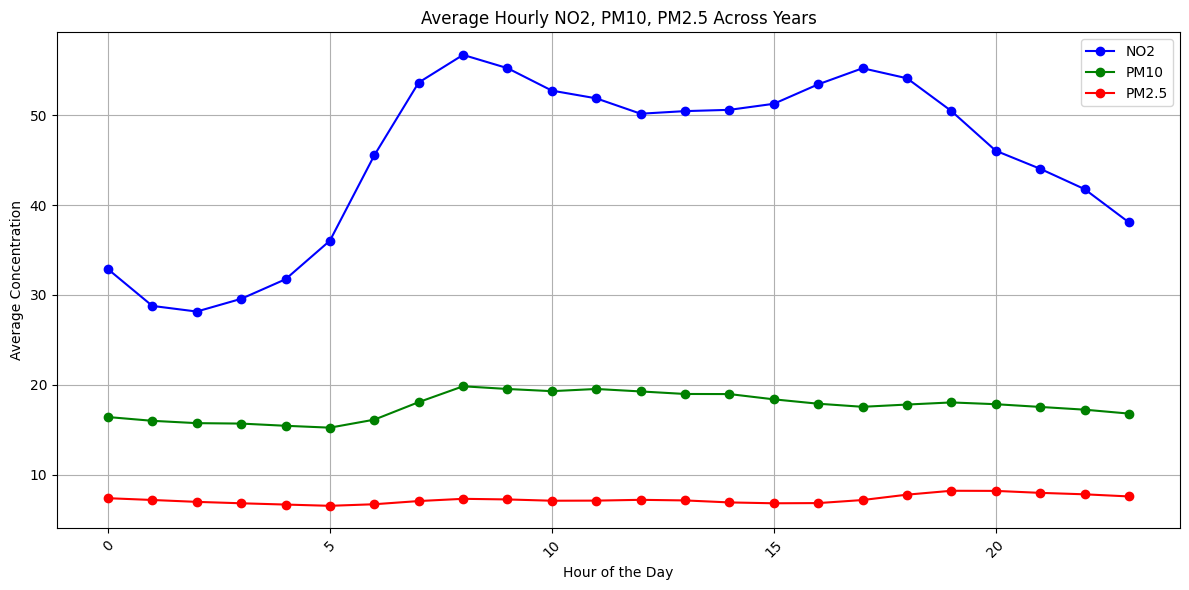

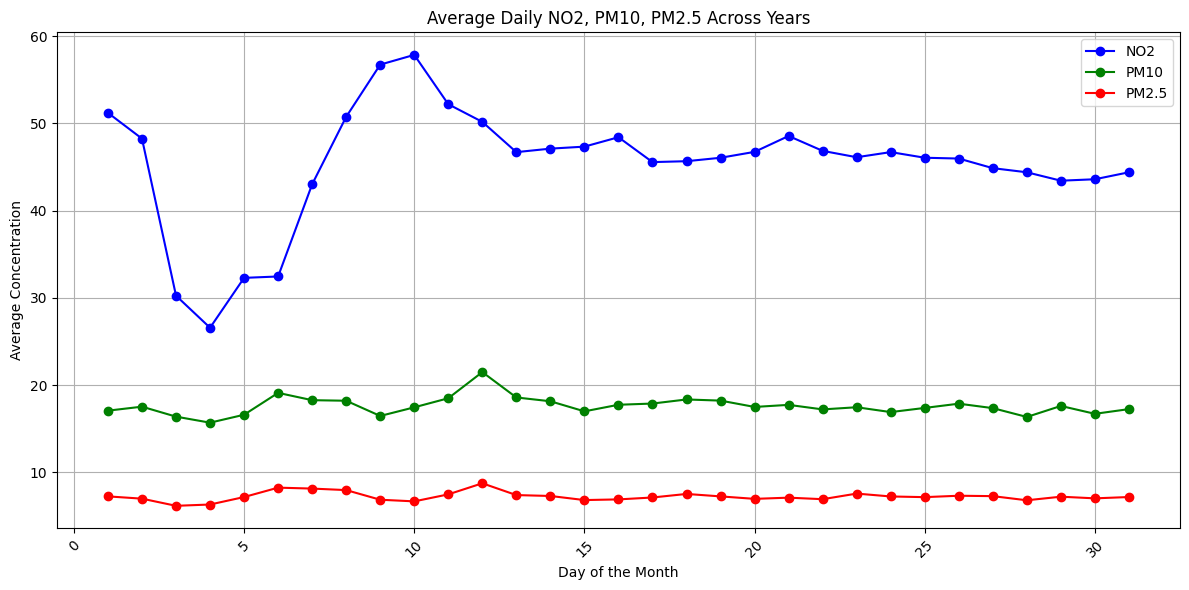

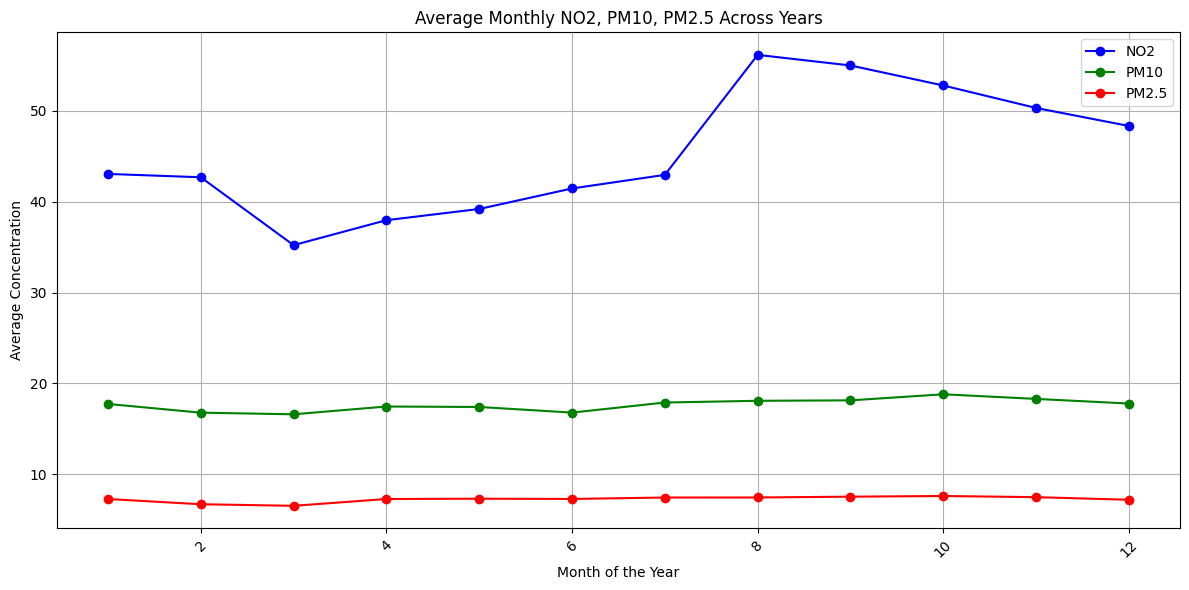

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
# Ensure 'Datetime' is in datetime format
df1['Datetime'] = pd.to_datetime(df1['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Set Datetime as the index
df1.set_index('Datetime', inplace=True)

# Extract hour, day, and month for grouping
df1['Hour'] = df1.index.hour
df1['Day'] = df1.index.day
df1['Month'] = df1.index.month

# Calculate average across years for each time unit
hourly_avg = df1.groupby('Hour')[['NO2', 'PM10', 'PM2.5']].mean()
daily_avg = df1.groupby('Day')[['NO2', 'PM10', 'PM2.5']].mean()
monthly_avg = df1.groupby('Month')[['NO2', 'PM10', 'PM2.5']].mean()

# Function to plot time series data
def plot_time_series(data, title, ylabel, xlabel, x_axis_values):
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis_values, data['NO2'], label='NO2', color='blue', linestyle='-', marker='o')
    plt.plot(x_axis_values, data['PM10'], label='PM10', color='green', linestyle='-', marker='o')
    plt.plot(x_axis_values, data['PM2.5'], label='PM2.5', color='red', linestyle='-', marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot hourly averages
plot_time_series(hourly_avg, 'Average Hourly NO2, PM10, PM2.5 Across Years', 'Average Concentration', 'Hour of the Day', hourly_avg.index)

# Plot daily averages
plot_time_series(daily_avg, 'Average Daily NO2, PM10, PM2.5 Across Years', 'Average Concentration', 'Day of the Month', daily_avg.index)

# Plot monthly averages
plot_time_series(monthly_avg, 'Average Monthly NO2, PM10, PM2.5 Across Years', 'Average Concentration', 'Month of the Year', monthly_avg.index)


In [8]:
# Define the file path
file_path = '/content/MyDrive/MyDrive/df3-filtered.csv'

# Read the CSV file into a DataFrame called dfTV
dfTV = pd.read_csv(file_path)

In [9]:
dfTV.head()


Datetime    TrafficV
0  2018-01-01 00:00:00   82.909091
1  2018-01-01 01:00:00   59.181818
2  2018-01-01 02:00:00  110.818182
3  2018-01-01 03:00:00  135.000000
4  2018-01-01 04:00:00  115.363636

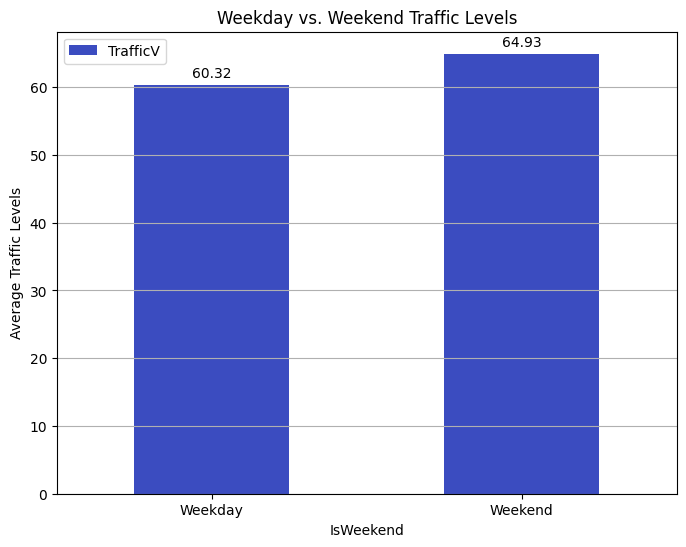

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dfTV has the 'Datetime' column, ensure it's in datetime format
dfTV['Datetime'] = pd.to_datetime(dfTV['Datetime'])

# Filter the dataframe for the date range between 1st January 2018 and 28th February 2023
start_date = '2018-01-01'
end_date = '2023-02-28'
dfTV = dfTV[(dfTV['Datetime'] >= start_date) & (dfTV['Datetime'] <= end_date)]

# Add a column for weekend/weekday
# Check if 'DayOfWeek' exists in dfTV, if not, calculate it from 'Datetime'
day_of_week_col = 'DayOfWeek' if 'DayOfWeek' in dfTV.columns else 'Datetime'

if 'DayOfWeek' not in dfTV.columns:
    dfTV['DayOfWeek'] = dfTV['Datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
day_of_week_col = 'DayOfWeek'  # Now we are sure we are using the correct column

# Add weekend/weekday label (Weekend if the day is Saturday or Sunday)
dfTV['IsWeekend'] = dfTV[day_of_week_col].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average traffic volume by weekend/weekday
weekend_avg = dfTV.groupby('IsWeekend')[['TrafficV']].mean()

# Plot weekday vs. weekend with values on bars
ax = weekend_avg.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Weekday vs. Weekend Traffic Levels')
plt.ylabel('Average Traffic Levels')
plt.grid(axis='y')

# Annotate bars with their actual values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()


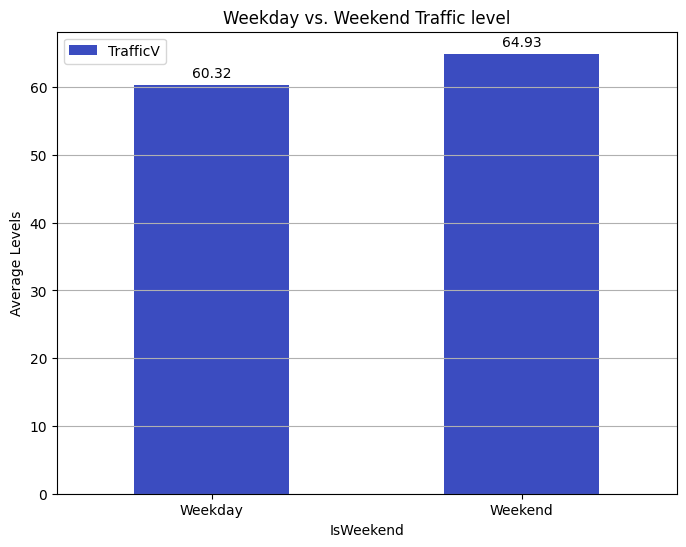

In [11]:
# Add a column for weekend/weekday
# Check if 'DayOfWeek' exists in dfTV, if not, try 'Datetime'
day_of_week_col = 'DayOfWeek' if 'DayOfWeek' in dfTV.columns else 'Datetime'

if 'DayOfWeek' not in dfTV.columns:
   dfTV['DayOfWeek'] = dfTV['Datetime'].dt.dayofweek
day_of_week_col = 'DayOfWeek'  # Now we are sure we are using the correct column

dfTV['IsWeekend'] = dfTV[day_of_week_col].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average TV levels by weekend/weekday
weekend_avg = dfTV.groupby('IsWeekend')[['TrafficV']].mean()


import matplotlib.pyplot as plt

# Plot weekday vs. weekend with values on bars
ax = weekend_avg.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Weekday vs. Weekend Traffic level')
plt.ylabel('Average Levels')
plt.grid(axis='y')

# Annotate bars with their actual values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()

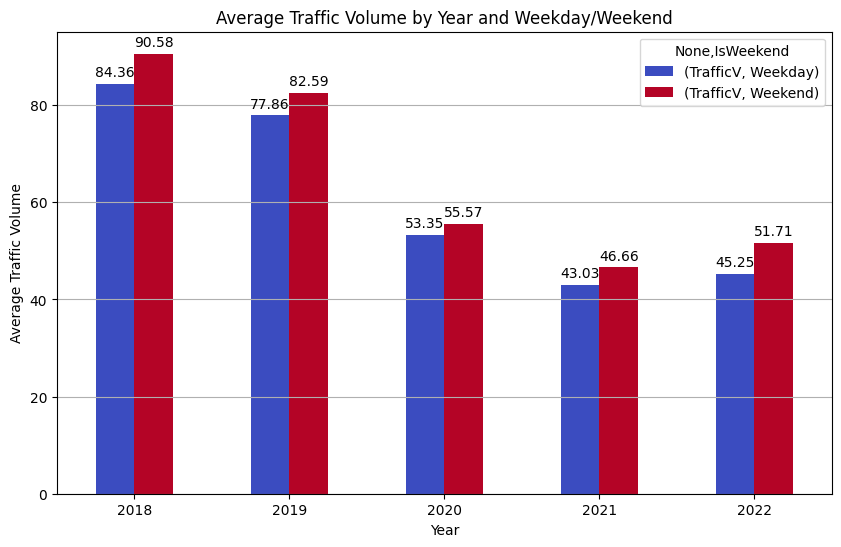

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dfTV has the 'Datetime' column and 'TrafficV' column, ensure 'Datetime' is in datetime format
dfTV['Datetime'] = pd.to_datetime(dfTV['Datetime'])

# Add a column for weekend/weekday classification
dfTV['DayOfWeek'] = dfTV['Datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
dfTV['IsWeekend'] = dfTV['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add a 'Year' column to make it easier to group by year
dfTV['Year'] = dfTV['Datetime'].dt.year

# Filter for the years 2018-2022
df_filtered = dfTV[dfTV['Year'].isin([2018, 2019, 2020, 2021, 2022])]

# Group by year and weekend/weekday, then calculate the average traffic volume
yearly_avg_traffic = df_filtered.groupby(['Year', 'IsWeekend'])[['TrafficV']].mean().unstack(fill_value=0)

# Plot the results
ax = yearly_avg_traffic.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('Average Traffic Volume by Year and Weekday/Weekend')
plt.ylabel('Average Traffic Volume')
plt.xlabel('Year')
plt.grid(axis='y')

# Annotate bars with their actual values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()


                 Datetime    TrafficV  DayOfWeek IsWeekend  Year
0     2018-01-01 00:00:00   82.909091          0   Weekday  2018
1     2018-01-01 01:00:00   59.181818          0   Weekday  2018
2     2018-01-01 02:00:00  110.818182          0   Weekday  2018
3     2018-01-01 03:00:00  135.000000          0   Weekday  2018
4     2018-01-01 04:00:00  115.363636          0   Weekday  2018
...                   ...         ...        ...       ...   ...
44779 2023-02-27 19:00:00   46.454545          0   Weekday  2023
44780 2023-02-27 20:00:00   39.363636          0   Weekday  2023
44781 2023-02-27 21:00:00   38.181818          0   Weekday  2023
44782 2023-02-27 22:00:00   33.909091          0   Weekday  2023
44783 2023-02-27 23:00:00   24.272727          0   Weekday  2023

[44784 rows x 5 columns]

Missing Values per Column:
Datetime     0
TrafficV     0
DayOfWeek    0
IsWeekend    0
Year         0
dtype: int64

Percentage of Missing Values per Column:
Datetime     0.0
TrafficV     0.0
Da

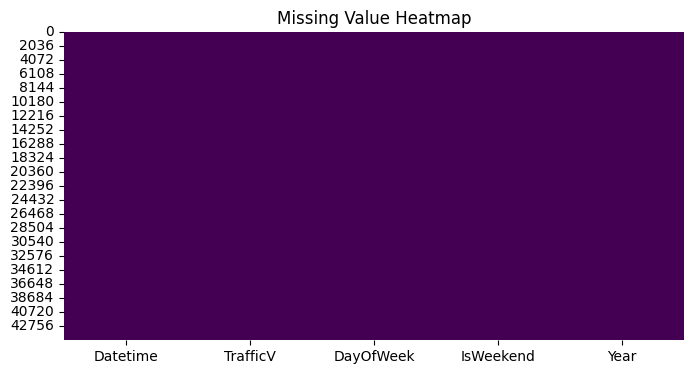


Pattern of Missingness:
0    44784
Name: count, dtype: int64


In [13]:

print(dfTV)

# Total missing values per column
print("\nMissing Values per Column:")
print(dfTV.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of Missing Values per Column:")
print(dfTV.isnull().mean() * 100)

# Rows with missing values
print("\nRows with Missing Values:")
print(dfTV[dfTV.isnull().any(axis=1)])

# Visualize missingness
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(dfTV.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Check patterns of missingness
print("\nPattern of Missingness:")
print(dfTV.isnull().sum(axis=1).value_counts())

In [14]:
df1.columns


Index(['NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS', 'Hour', 'Day',
       'Month'],
      dtype='object')

In [15]:
# Ensure both DataFrames have a Datetime column and convert it to datetime type if needed
# If 'Datetime' is the index in df1, reset it to a column
if 'Datetime' not in df1.columns:
    df1 = df1.reset_index()

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
dfTV['Datetime'] = pd.to_datetime(dfTV['Datetime'])

# Merge the two DataFrames on the Datetime column
df_combined = pd.merge(df1, dfTV, on='Datetime', how='inner')  # Use 'inner' for common dates only

# Display the combined DataFrame
print("Combined DataFrame:")
print(df_combined)

Combined DataFrame:
                 Datetime        NO2       PM10     PM2.5         RH  \
0     2018-01-01 00:00:00  64.216400  14.020000  6.980000  65.840000   
1     2018-01-01 01:00:00  46.040667  15.966667  8.900000  65.840000   
2     2018-01-01 02:00:00  28.285000  12.050000  5.183333  65.840000   
3     2018-01-01 03:00:00  24.381333  12.750000  5.133333  65.840000   
4     2018-01-01 04:00:00  21.431167  10.700000  4.250000  65.840000   
...                   ...        ...        ...       ...        ...   
44494 2023-02-27 19:00:00   9.119333  14.201667  6.553333  67.200000   
44495 2023-02-27 20:00:00   8.962333  14.036667  6.165000  69.583333   
44496 2023-02-27 21:00:00   9.567000  13.128333  5.685000  67.933333   
44497 2023-02-27 22:00:00   8.408667  12.518333  5.603333  69.766667   
44498 2023-02-27 23:00:00   7.899500  12.851667  5.571667  74.300000   

            Temp          WD        WS  Hour  Day  Month    TrafficV  \
0      20.880000   80.880000  0.300000     

In [16]:
df_combined.columns


Index(['Datetime', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS', 'Hour',
       'Day', 'Month', 'TrafficV', 'DayOfWeek', 'IsWeekend', 'Year'],
      dtype='object')

In [17]:
# Save df7_filtered to a CSV file
df_combined.to_csv('df_combined.csv', index=False)

print("DataFrame saved as 'df_combined.csv'.")

DataFrame saved as 'df_combined.csv'.


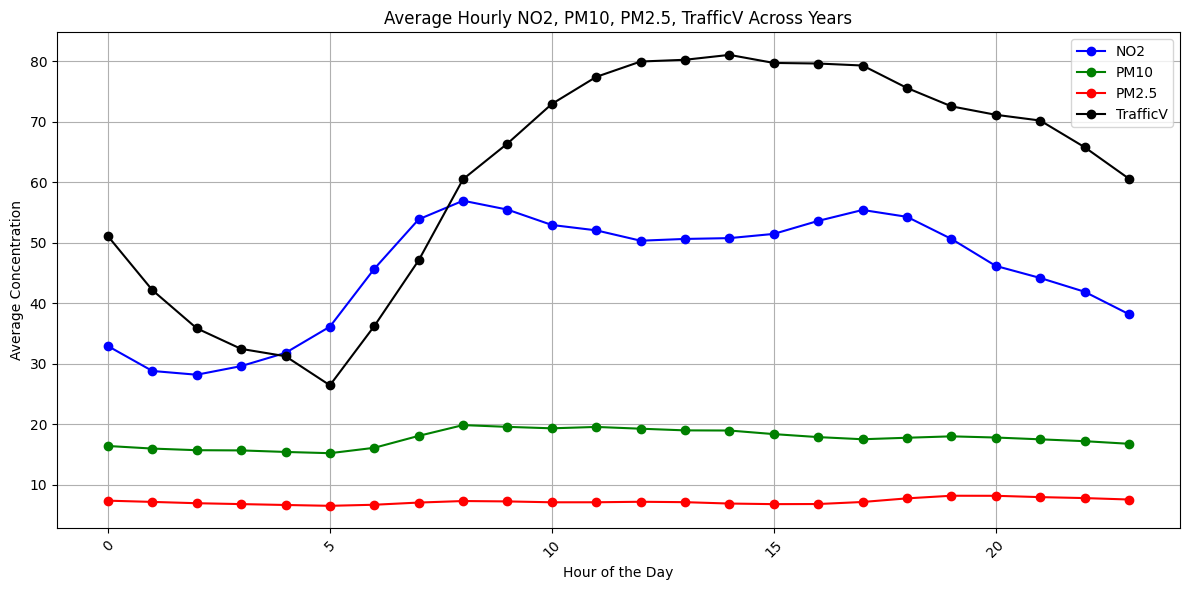

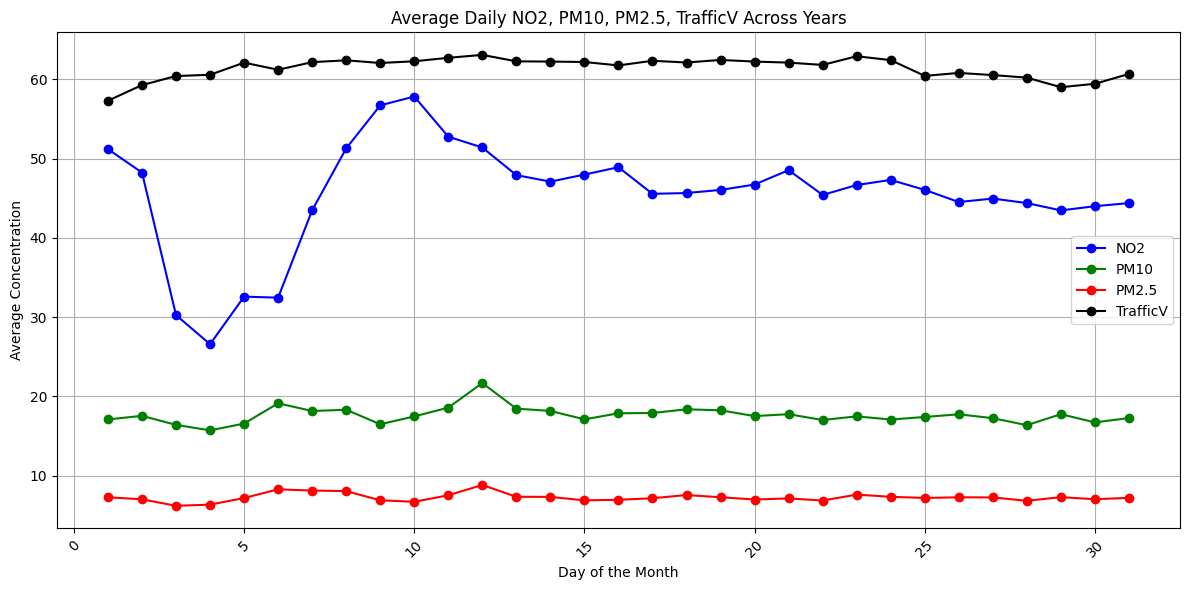

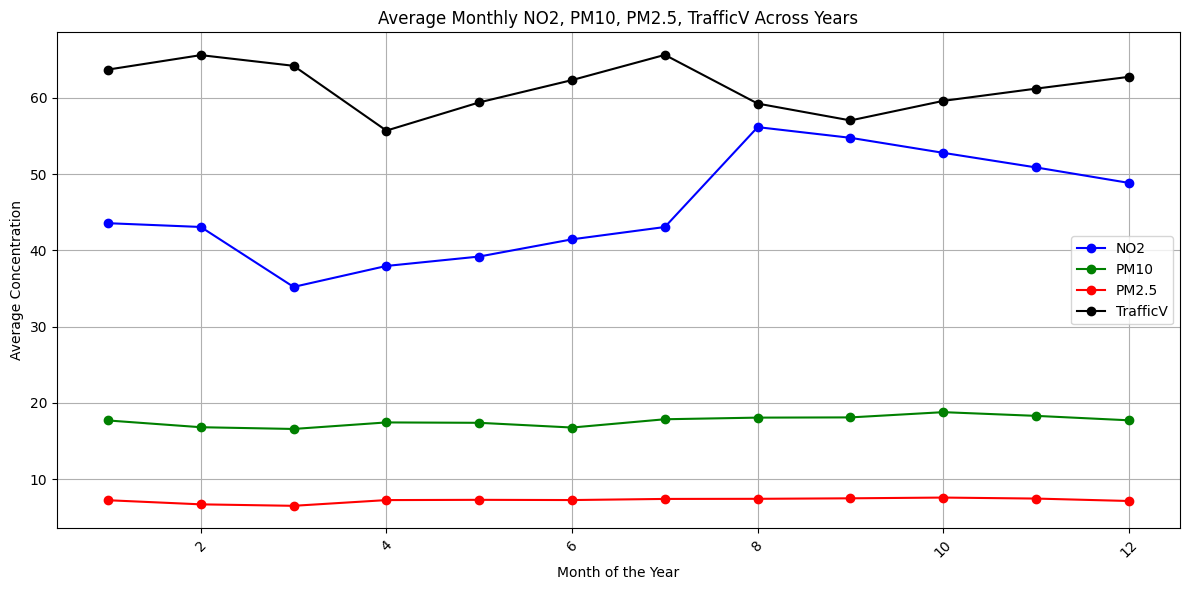

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure 'Datetime' is in datetime format
df_combined['Datetime'] = pd.to_datetime(df_combined['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Set Datetime as the index
df_combined.set_index('Datetime', inplace=True)

# Extract hour, day, and month for grouping
df_combined['Hour'] = df_combined.index.hour
df_combined['Day'] = df_combined.index.day
df_combined['Month'] = df_combined.index.month

# Calculate average across years for each time unit
hourly_avg = df_combined.groupby('Hour')[['NO2', 'PM10', 'PM2.5','TrafficV']].mean()
daily_avg = df_combined.groupby('Day')[['NO2', 'PM10', 'PM2.5','TrafficV']].mean()
monthly_avg = df_combined.groupby('Month')[['NO2', 'PM10', 'PM2.5','TrafficV']].mean()

# Function to plot time series data
def plot_time_series(data, title, ylabel, xlabel, x_axis_values):
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis_values, data['NO2'], label='NO2', color='blue', linestyle='-', marker='o')
    plt.plot(x_axis_values, data['PM10'], label='PM10', color='green', linestyle='-', marker='o')
    plt.plot(x_axis_values, data['PM2.5'], label='PM2.5', color='red', linestyle='-', marker='o')
    plt.plot(x_axis_values, data['TrafficV'], label='TrafficV', color='Black', linestyle='-', marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot hourly averages
plot_time_series(hourly_avg, 'Average Hourly NO2, PM10, PM2.5, TrafficV Across Years', 'Average Concentration', 'Hour of the Day', hourly_avg.index)

# Plot daily averages
plot_time_series(daily_avg, 'Average Daily NO2, PM10, PM2.5, TrafficV Across Years', 'Average Concentration', 'Day of the Month', daily_avg.index)

# Plot monthly averages
plot_time_series(monthly_avg, 'Average Monthly NO2, PM10, PM2.5, TrafficV Across Years', 'Average Concentration', 'Month of the Year', monthly_avg.index)

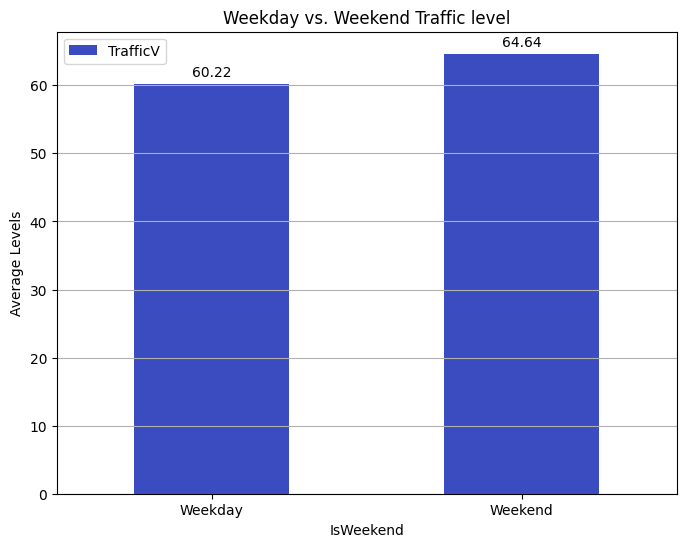

In [ ]:
# Add a column for weekend/weekday
# Check if 'DayOfWeek' exists in df_combined, if not, try 'Datetime'
day_of_week_col = 'DayOfWeek' if 'DayOfWeek' in df_combined.columns else 'Datetime'

if 'DayOfWeek' not in df_combined.columns:
    df_combined['DayOfWeek'] = df_combined['Datetime'].dt.dayofweek
day_of_week_col = 'DayOfWeek'  # Now we are sure we are using the correct column

df_combined['IsWeekend'] = df_combined[day_of_week_col].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average TV levels by weekend/weekday
weekend_avg = df_combined.groupby('IsWeekend')[['TrafficV']].mean()


import matplotlib.pyplot as plt

# Plot weekday vs. weekend with values on bars
ax = weekend_avg.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
plt.title('Weekday vs. Weekend Traffic level')
plt.ylabel('Average Levels')
plt.grid(axis='y')

# Annotate bars with their actual values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

plt.xticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()


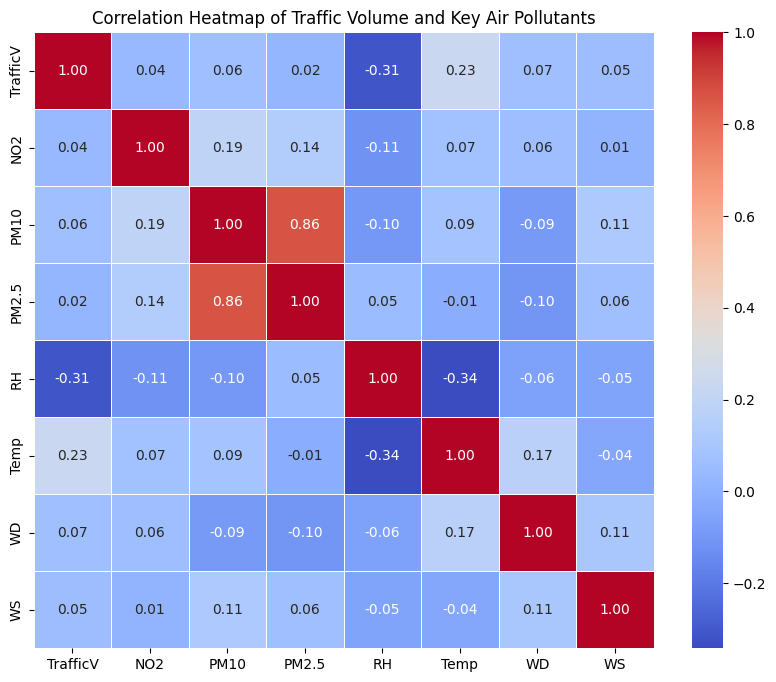

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for relevant columns
columns_of_interest = ['TrafficV', 'NO2', 'PM10', 'PM2.5', 'RH', 'Temp', 'WD', 'WS']
correlation_matrix = df_combined[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Traffic Volume and Key Air Pollutants")
plt.show()


In [ ]:

#Correlation Analysis

# Select relevant columns
columns_of_interest = ['TrafficV', 'NO2', 'PM10', 'PM2.5']
correlation_matrix = df_combined[columns_of_interest].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          TrafficV       NO2      PM10     PM2.5
TrafficV  1.000000  0.039487  0.063207  0.023827
NO2       0.039487  1.000000  0.192563  0.138987
PM10      0.063207  0.192563  1.000000  0.859113
PM2.5     0.023827  0.138987  0.859113  1.000000


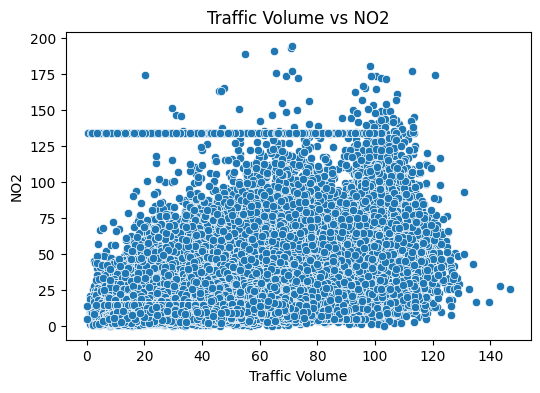

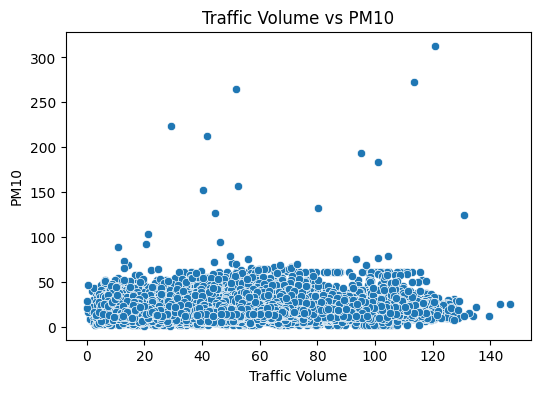

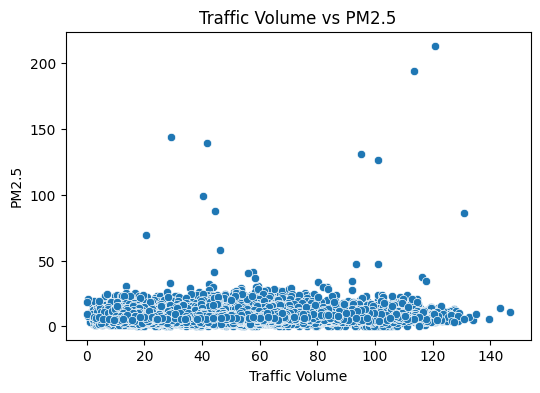

In [ ]:
#Scatter Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for each pollutant vs. TrafficV
pollutants = ['NO2', 'PM10', 'PM2.5']

for pollutant in pollutants:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='TrafficV', y=pollutant, data=df_combined)
    plt.title(f"Traffic Volume vs {pollutant}")
    plt.xlabel("Traffic Volume")
    plt.ylabel(pollutant)
    plt.show()


Regression Coefficient (TrafficV -> NO2): 0.054690620224143414
Intercept: 42.24295851132032


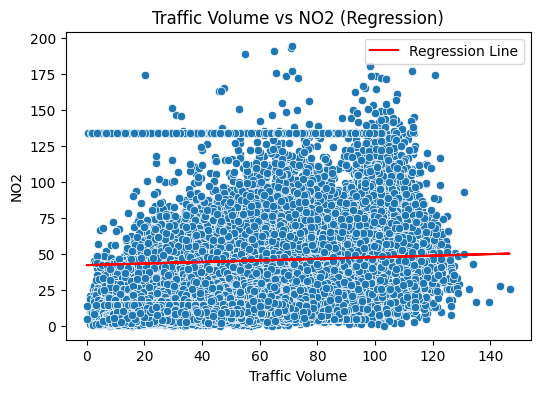

In [ ]:
#regression analysis

from sklearn.linear_model import LinearRegression
import numpy as np

# Example: Regression for TrafficV vs. NO2
X = df_combined[['TrafficV']].dropna()
y = df_combined['NO2'].dropna()

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Display the regression coefficient and intercept
print(f"Regression Coefficient (TrafficV -> NO2): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Plot the regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='TrafficV', y='NO2', data=df_combined)
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title("Traffic Volume vs NO2 (Regression)")
plt.xlabel("Traffic Volume")
plt.ylabel("NO2")
plt.legend()
plt.show()


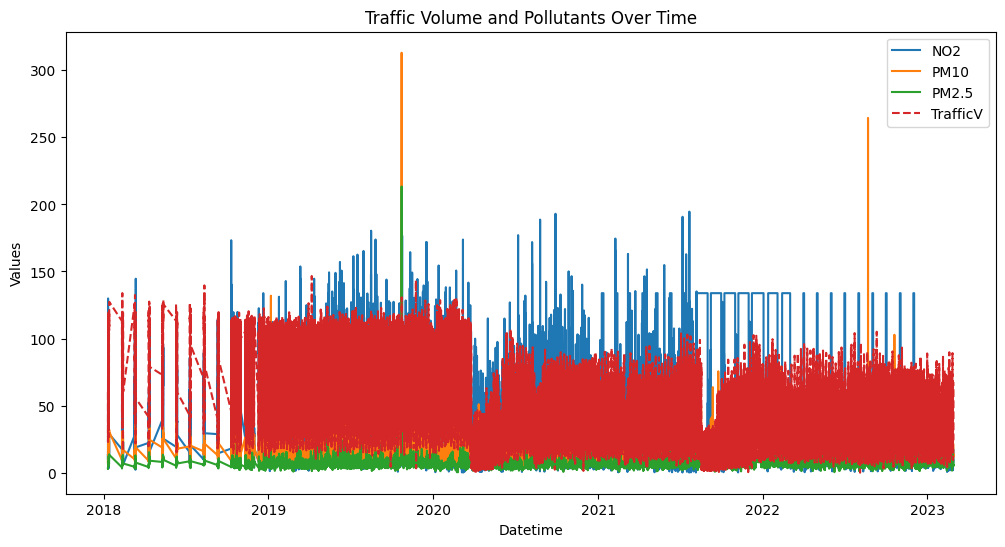

In [ ]:
# Plot time series of TrafficV and pollutants
pollutants = ['NO2', 'PM10', 'PM2.5']

plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.lineplot(x='Datetime', y=pollutant, data=df_combined, label=pollutant)
sns.lineplot(x='Datetime', y='TrafficV', data=df_combined, label='TrafficV', linestyle='--')
plt.title("Traffic Volume and Pollutants Over Time")
plt.xlabel("Datetime")
plt.ylabel("Values")
plt.legend()
plt.show()


In [ ]:
#Multivariate Analysis
from statsmodels.api import OLS, add_constant

# Example: Predict NO2 based on TrafficV, Temp, RH, etc.
X = df_combined[['TrafficV', 'Temp', 'RH']].dropna()
y = df_combined['NO2'].dropna()

# Add constant term for the intercept
X = add_constant(X)

# Fit the model
model = OLS(y, X).fit()

# Display summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    NO2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     177.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          1.95e-114
Time:                        03:12:39   Log-Likelihood:            -1.9535e+05
No. Observations:               38253   AIC:                         3.907e+05
Df Residuals:                   38249   BIC:                         3.908e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.5253      1.911     31.148      0.0

In [ ]:
#some findings about traffic volume

In [ ]:
#Extract Key Components
import pandas as pd

# Convert Datetime to pandas datetime format
dfTV['Datetime'] = pd.to_datetime(dfTV['Datetime'])

# Extract Year, Month, Day, Hour from Datetime
dfTV['Year'] = dfTV['Datetime'].dt.year
dfTV['Month'] = dfTV['Datetime'].dt.month
dfTV['Day'] = dfTV['Datetime'].dt.day
dfTV['Hour'] = dfTV['Datetime'].dt.hour
dfTV['DayOfWeek'] = dfTV['Datetime'].dt.dayofweek  # Monday=0, Sunday=6


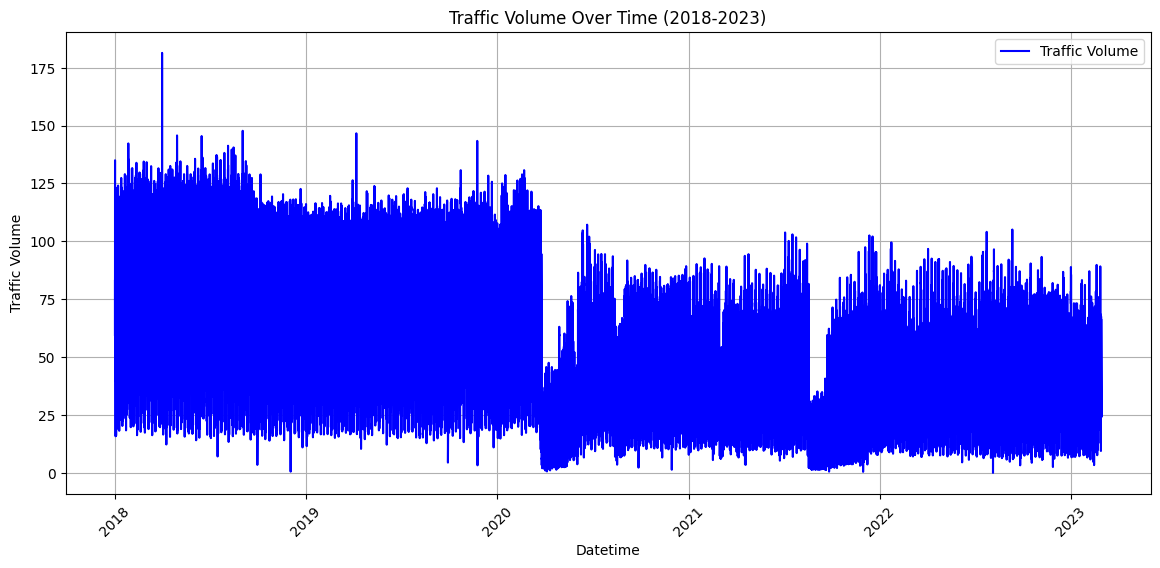

In [ ]:
#Plot the Traffic Volume Over Time (Time-Series Visualization)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(dfTV['Datetime'], dfTV['TrafficV'], label='Traffic Volume', color='b')
plt.title('Traffic Volume Over Time (2018-2023)')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


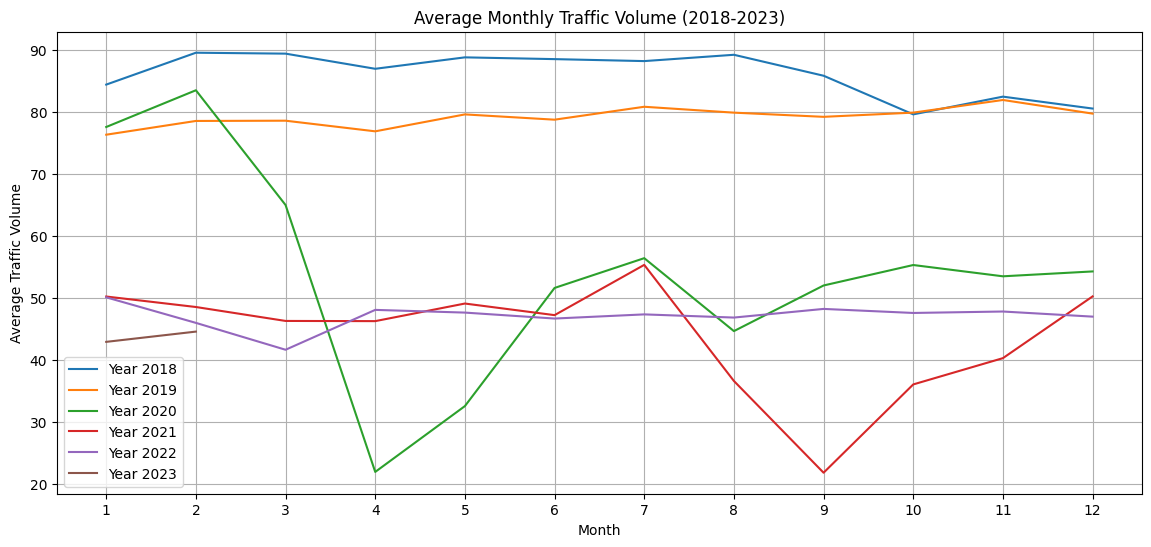

In [ ]:
#Monthly Traffic Volume Average
# Group by Year and Month and calculate the average traffic volume
monthly_avg = dfTV.groupby(['Year', 'Month'])['TrafficV'].mean().reset_index()

# Plot the average traffic volume by month
plt.figure(figsize=(14, 6))
for year in monthly_avg['Year'].unique():
    subset = monthly_avg[monthly_avg['Year'] == year]
    plt.plot(subset['Month'], subset['TrafficV'], label=f'Year {year}')

plt.title('Average Monthly Traffic Volume (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


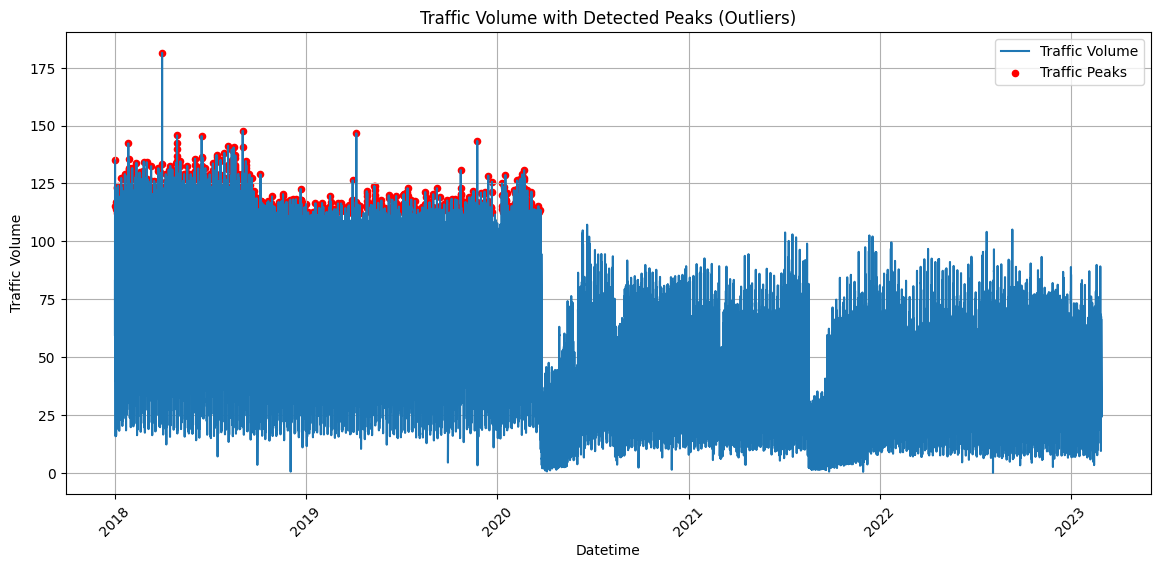

                 Datetime    TrafficV  Year  Month  Day  Hour  DayOfWeek
3     2018-01-01 03:00:00  135.000000  2018      1    1     3          0
4     2018-01-01 04:00:00  115.363636  2018      1    1     4          0
61    2018-01-03 13:00:00  113.818182  2018      1    3    13          2
63    2018-01-03 15:00:00  116.909091  2018      1    3    15          2
85    2018-01-04 13:00:00  113.000000  2018      1    4    13          3
...                   ...         ...   ...    ...  ...   ...        ...
19246 2020-03-14 22:00:00  112.454545  2020      3   14    22          5
19249 2020-03-15 01:00:00  113.545455  2020      3   15     1          6
19361 2020-03-19 17:00:00  115.181818  2020      3   19    17          3
19382 2020-03-20 14:00:00  112.636364  2020      3   20    14          4
19456 2020-03-23 16:00:00  113.545455  2020      3   23    16          0

[2233 rows x 7 columns]


In [ ]:
#Traffic Volume Peaks (Detecting Outliers)
# Set a threshold for detecting outliers (for example, 95th percentile)
threshold = dfTV['TrafficV'].quantile(0.95)

# Filter out the peaks (outliers)
outliers = dfTV[dfTV['TrafficV'] > threshold]

# Plot the peaks
plt.figure(figsize=(14, 6))
plt.plot(dfTV['Datetime'], dfTV['TrafficV'], label='Traffic Volume')
plt.scatter(outliers['Datetime'], outliers['TrafficV'], color='r', label='Traffic Peaks', s=20)
plt.title('Traffic Volume with Detected Peaks (Outliers)')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Optionally print outliers
print(outliers)
